In [115]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('notebook')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
plt.rcParams.update(params)

In [99]:
df = pd.read_csv('densenet_inference_test.csv', index_col=0)
df.mean()

exit           0.973000
prediction    48.845000
target        49.500000
correct        0.823600
score          0.824121
time           0.031988
dtype: float64

In [100]:
data = df.to_numpy()

In [101]:
df = pd.DataFrame(data[1:], columns=['exit', 'prediction', 'target', 'correct', 'score', 'time'])

In [102]:
df.mean()

exit           0.973195
prediction    48.854771
target        49.509902
correct        0.823565
score          0.824153
time           0.031801
dtype: float64

In [103]:
len(df.loc[df['exit']==0])

1725

In [104]:
len(df.loc[(df['exit']==0) & (df['correct'] == False)])

219

In [105]:
len(df.loc[df['exit']==1])

2072

In [106]:
len(df.loc[df['exit']==2])

813

In [107]:
len(df.loc[df['exit']==3])

389

In [108]:
len(df.loc[(df['exit']==3) & (df['correct'] == False)])

177

In [109]:
len(df.loc[(df['correct'] == False)])

882

# ResNet

In [125]:
df = pd.read_csv('resnet101_all_inference_test.csv', index_col=0)
conventional = pd.read_csv('resnet_conv_inference_test.csv', index_col=0)
df.correct = df.correct.astype(int)
df

,threshold,exit,prediction,target,correct,score_margin,time
0,0.1,0,0,0,1,0.204359,0.977127
1,0.1,0,0,0,1,0.989505,0.014066
2,0.1,0,0,0,1,0.357393,0.014050
3,0.1,0,0,0,1,0.870633,0.012749
4,0.1,0,0,0,1,0.660327,0.013005
5,0.1,0,0,0,1,0.799488,0.012808
6,0.1,0,0,0,1,0.999894,0.013275
7,0.1,0,0,0,1,0.998322,0.012334
8,0.1,1,0,0,1,0.962256,0.019159
9,0.1,0,92,0,0,0.110625,0.011794


In [128]:
conventional.mean().time

0.04474636967999995

In [85]:
data = df.to_numpy()

In [86]:
df = pd.DataFrame(data[1:], columns=['threshold', 'exit', 'prediction', 'target', 'correct', 'score', 'time'])

In [147]:
arr = []

x = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in df.groupby(['threshold']):
    tmp = i[1].mean()
    arr.append((tmp.correct, tmp.time))

#sns.lineplot(data=i[1].mean().correct)
df_stats = pd.DataFrame(arr, columns=["Mean Accuracy", "Mean Time"], index=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
df_stats

,Mean Accuracy,Mean Time
0.1,0.6458,0.017376
0.2,0.7352,0.021034
0.3,0.7884,0.023683
0.4,0.8226,0.026222
0.5,0.8488,0.028200
0.6,0.8662,0.029933
0.7,0.8754,0.032040
0.8,0.8842,0.033742
0.9,0.8902,0.036733


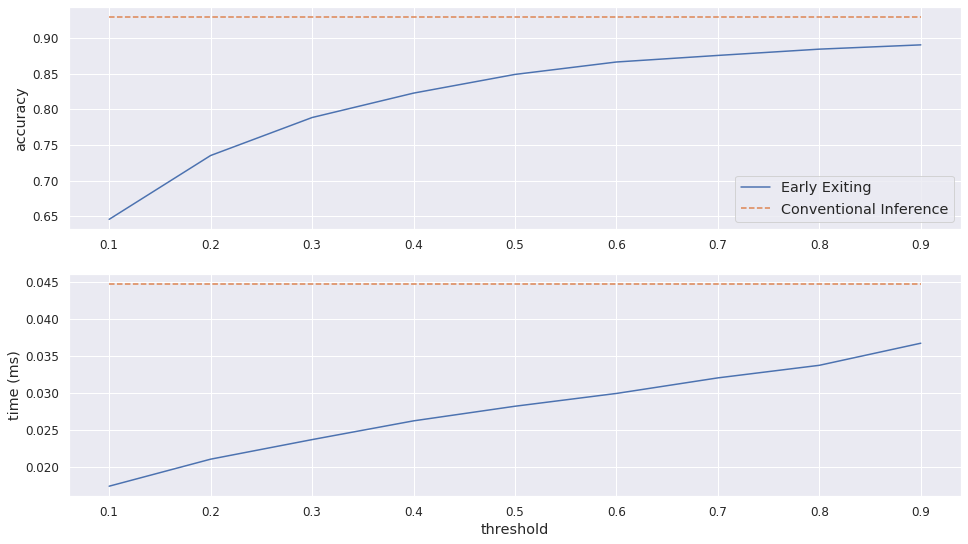

In [150]:
fig, axes = plt.subplots(2,1)
sns.lineplot(data=df_stats['Mean Accuracy'], ax=axes[0])
sns.lineplot(data=df_stats['Mean Time'], ax=axes[1])
axes[0].set_ylabel('accuracy')
axes[1].set_ylabel('time (ms)')
plt.xlabel('threshold')
sns.lineplot(x=x, y=conventional.mean().correct*np.ones(9), ax=axes[0])
sns.lineplot(x=x, y=conventional.mean().time*np.ones(9), ax=axes[1])
axes[0].lines[1].set_linestyle("--")
axes[1].lines[1].set_linestyle("--")

axes[0].legend(['Early Exiting', 'Conventional Inference'])
#ns.lineplot(data=arr[0], ax= axes[0])
#sns.lineplot(data=arr[1], ax=axes[1])

In [125]:
len(df.loc[df['exit']==0])

1285

In [126]:
len(df.loc[(df['exit']==0) & (df['correct'] == False)])

176

In [127]:
len(df.loc[df['exit']==1])

1707

In [128]:
len(df.loc[df['exit']==2])

1653

In [129]:
len(df.loc[df['exit']==3])

354

In [130]:
len(df.loc[(df['exit']==3) & (df['correct'] == False)])

189

In [131]:
len(df.loc[(df['correct'] == False)])

756